In [4]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


#**Análise Exploratória de Dados**

In [0]:
%%R
# Carregando o pacote readr
install.packages("readr")
library("readr")

# Carregando o dataset
carros <- read_csv("carros-usados.csv")

# Resumo dos dados
str(carros)


##**Análise Exploratória de Dados - Variáveis Numéricas**

In [0]:
%%R#Calcular a média de preço 
mean(carros$preco)

[1] 12961.93


In [0]:
%%R#Caclular a mediana de preço, não está numa distribuição normal de acordo à média
median(carros$preco)

[1] 13591.5


In [0]:
%%R#Calcular quartis
quantile(carros$preco)

     0%     25%     50%     75%    100% 
 3800.0 10995.0 13591.5 14904.5 21992.0 


In [0]:
%%R#Calcular percentis
quantile(carros$preco, probs = c(0.01, 0.99))

      1%      99% 
 5428.69 20505.00 


In [0]:
%%R#Calcular percentis específicos
quantile(carros$preco, seq( from = 0, to = 1, by = 0.20))

     0%     20%     40%     60%     80%    100% 
 3800.0 10759.4 12993.8 13992.0 14999.0 21992.0 


In [0]:
%%R#Diferença interquartil, diferença entre Q3 e Q1
IQR(carros$preco) 

[1] 3909.5


In [0]:
%%R#Visualizar valor mínimo e valor máximo 
range(carros$preco)

[1]  3800 21992


In [8]:
%%R#Diferença entre o valor mínimo e o valor máximo
diff(range(carros$preco))

[1] 18192


##**Boxplot** - Análise Univariada

Leitura de Baixo para Cima - Q1, Q2 (Mediana) e Q3

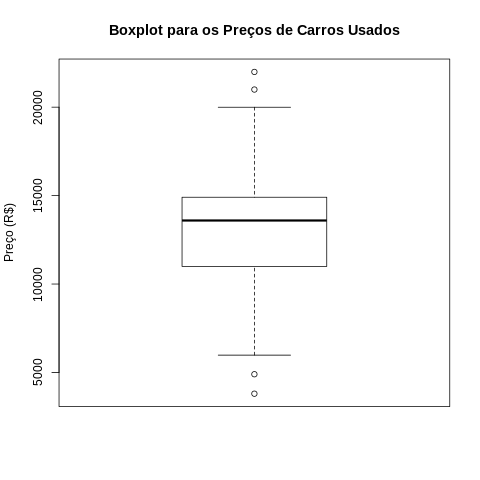

In [0]:
%%R
boxplot(carros$preco, main = "Boxplot para os Preços de Carros Usados", ylab = "Preço (R$)")

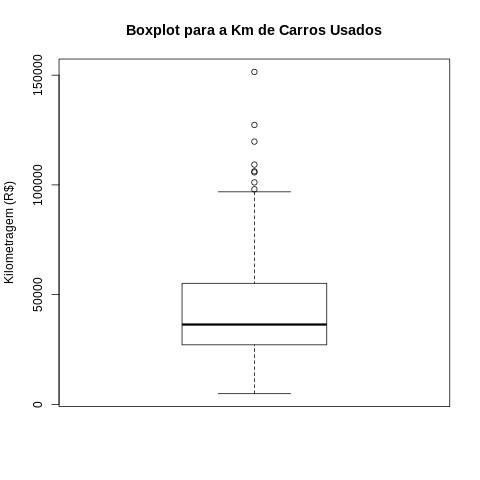

In [0]:
%%R
boxplot(carros$kilometragem, main = "Boxplot para a Km de Carros Usados", ylab = "Kilometragem (R$)")

##**Histograma** - Análise Univariada

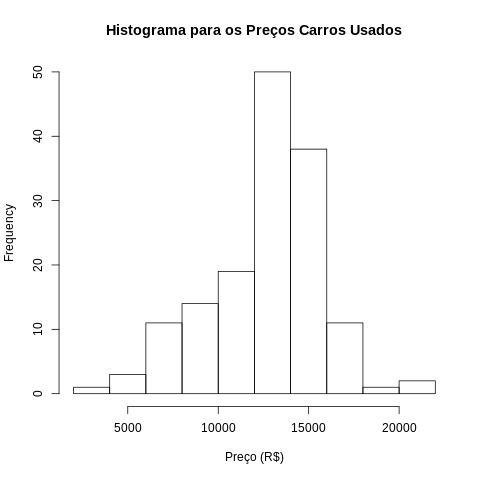

In [0]:
# Indicam a frequência de valores dentro de cada bin (classe de valores)
%%R
hist(carros$preco, main = "Histograma para os Preços Carros Usados", xlab = "Preço (R$)")

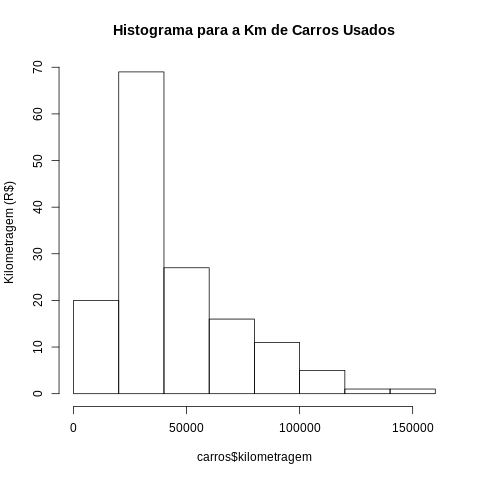

In [0]:
%%R
hist(carros$kilometragem, main = "Histograma para a Km de Carros Usados", ylab = "Kilometragem (R$)")

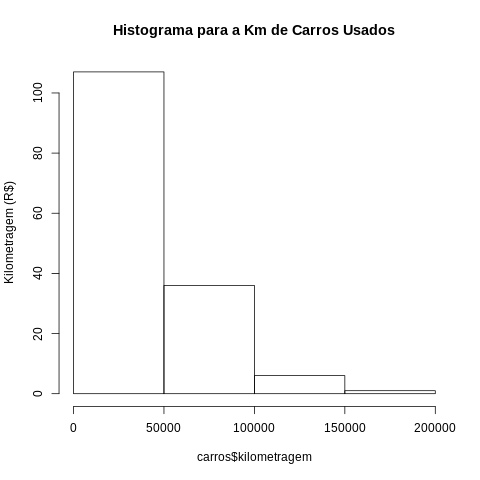

In [0]:
%%R
hist(carros$kilometragem, main = "Histograma para a Km de Carros Usados", breaks = 5, ylab = "Kilometragem (R$)")

#**Scatterplot** - Análise Multivariada

### Relação entre a variável preço e a a variável km rodados

Observando o gráfico temos que a medida que aumenta a kilometragem, o preço diminui.

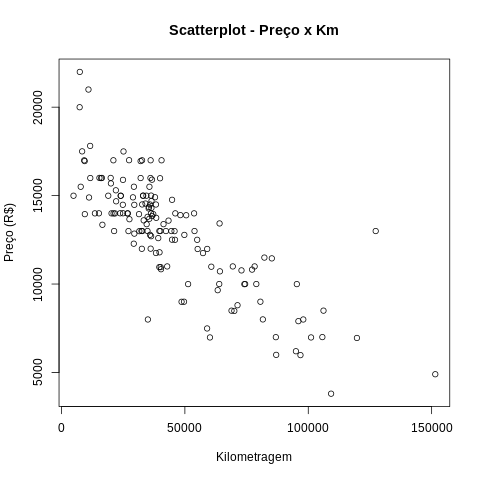

In [0]:
# Usando o preço como variável dependente (y)
%%R
plot(x = carros$kilometragem, y = carros$preco,
     main = "Scatterplot - Preço x Km",
     xlab = "Kilometragem",
     ylab = "Preço (R$)")

##**Medidas de Dispersão**

### Valores altos indicam dados muito espalhados com relação a média.

### A média é a métrica inicial. Em torno da média teremos a distribuição dos dados e dependendo da distribuição destes, poderá afetar o modelo de Machine Learning. 




In [9]:
# Números maiores indicam que os dados estão espalhados mais amplamente em torno da média. 
%%R# Variância da variável preço
var(carros$preco)

[1] 9749892


In [0]:
%% # Desvio-Padrão indica, em média, a quantidade de cada valor diferente da média.
sd(carros$preco)

[1] 3122.482


In [0]:
%%R# Variância da variável kilometragem         
var(carros$kilometragem)

[1] 728033954


In [0]:
%%R# Desvio-Padrão da variável kilometragem
sd(carros$kilometragem)

[1] 26982.1


---

##**Análise Exploratória de Dados - Variáveis Categóricas**

---



In [10]:
%%R
str(carros)

tibble [150 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ano         : num [1:150] 2011 2011 2011 2011 2012 ...
 $ modelo      : chr [1:150] "SEL" "SEL" "SEL" "SEL" ...
 $ preco       : num [1:150] 21992 20995 19995 17809 17500 ...
 $ kilometragem: num [1:150] 7413 10926 7351 11613 8367 ...
 $ cor         : chr [1:150] "Bege" "Cinza" "Prata" "Cinza" ...
 $ transmissao : chr [1:150] "AUTO" "AUTO" "AUTO" "AUTO" ...
 - attr(*, "spec")=
  .. cols(
  ..   ano = col_double(),
  ..   modelo = col_character(),
  ..   preco = col_double(),
  ..   kilometragem = col_double(),
  ..   cor = col_character(),
  ..   transmissao = col_character()
  .. )


###**Table de contingência**

In [16]:
%%R#Contou quantas vezes cada linha aparece com a respectiva cor, na coluna cor.
table(carros$cor


    Azul     Bege   Branco    Cinza     Gold    Prata    Preto    Verde 
      17        3       16       16        1       32       35        5 
Vermelho 
      25 


###**Contingência de modelos**

In [15]:
%%R
table(carros$modelo)


 SE SEL SES 
 78  23  49 


##**Calculando a proporção de cada categoria**

In [19]:
%%R #calculando a tabela de contigência modelo e colocando no objeto de "contingência modelo"
model_table <- table(carros$modelo)
model_table


 SE SEL SES 
 78  23  49 


In [20]:
%%R #esta função calcula a proporção de cata categoria dentro da tabela de contingência
prop.table(model_table)


       SE       SEL       SES 
0.5200000 0.1533333 0.3266667 


##**Arredondando os valores**

In [0]:
%%R
model_table <- table(carros$modelo)

In [23]:
%%R 
model_table <- prop.table(model_table) * 100
model_table


      SE      SEL      SES 
52.00000 15.33333 32.66667 


In [24]:
%%R #arredondando para número de digitos depois da vírgula
round(model_table, digits = 1)


  SE  SEL  SES 
52.0 15.3 32.7 


##**Criando uma nova variável indicando cores conservadoras**
#### (que as pessoas compram com mais frequência)

In [25]:
%%R
head(carros)

# A tibble: 6 x 6
    ano modelo preco kilometragem cor    transmissao
  <dbl> <chr>  <dbl>        <dbl> <chr>  <chr>      
1  2011 SEL    21992         7413 Bege   AUTO       
2  2011 SEL    20995        10926 Cinza  AUTO       
3  2011 SEL    19995         7351 Prata  AUTO       
4  2011 SEL    17809        11613 Cinza  AUTO       
5  2012 SE     17500         8367 Branco AUTO       
6  2010 SEL    17495        25125 Prata  AUTO       


In [0]:
%%R #criada uma nova coluna chamada convserv dentro do dataset
carros$conserv <- carros$cor %in% c("Preto", "Cinza", "Prata", "Branco")

In [29]:
%%R
head(carros)

# A tibble: 6 x 7
    ano modelo preco kilometragem cor    transmissao conserv
  <dbl> <chr>  <dbl>        <dbl> <chr>  <chr>       <lgl>  
1  2011 SEL    21992         7413 Bege   AUTO        FALSE  
2  2011 SEL    20995        10926 Cinza  AUTO        TRUE   
3  2011 SEL    19995         7351 Prata  AUTO        TRUE   
4  2011 SEL    17809        11613 Cinza  AUTO        TRUE   
5  2012 SE     17500         8367 Branco AUTO        TRUE   
6  2010 SEL    17495        25125 Prata  AUTO        TRUE   


##**Checando a variável**

In [32]:
%%R #O table aplicado a carros$conserv retra a preferência por si
table(carros$conserv)


FALSE  TRUE 
   51    99 


---

##**CrossTable** {gmodels}

### Tabulação Cruzada e Relacionamento de Variáveis Categóricas

### Exibir frequências e frequências relativas de observações




In [0]:
%%R
install.packages("gmodels")
library(gmodels)

In [35]:
%%R
CrossTable(x = carros$modelo, y = carros$conserv) 
#Tabulação dos três modelos em relação às cores não conservadores (FALSE) e conservadoras (TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
              | carros$conserv 
carros$modelo |     FALSE |      TRUE | Row Total | 
--------------|-----------|-----------|-----------|
           SE |        27 |        51 |        78 | 
              |     0.009 |     0.004 |           | 
              |     0.346 |     0.654 |     0.520 | 
              |     0.529 |     0.515 |           | 
              |     0.180 |     0.340 |           | 
--------------|-----------|-----------|-----------|
          SEL |         7 |        16 |        23 | 
              |     0.086 |     0.044 |           | 
              |     0.304 |     0.696 |     0.153 | 
              |     0.137 |     0.162 |           | 
              |     0.047 |     0.107 |           | 
--------------|---------

##**Teste Qui-Quadrado χ2**- Teste de hipóteses

Quando quisermos realizar um teste de hipóteses considerando variáveis qualitativas, o teste Qui-Quadrado pode ser uma opção.

É um teste que não depende de parâmetros populacionais, como média e variância.

Quando observamos um dataset não podemos inferir se temos associação entre duas variáveis a menos que façamos os testes, seja testes entre variáveis numéricas ou categóricas.

In [0]:
# Qui Quadrado, simbolizado por χ2 é um teste de 
# hipóteses que se destina a encontrar um valor da 
# dispersão para duas variáveis nominais, avaliando a 
# associação existente entre variáveis qualitativas.

# É um teste não paramétrico, ou seja, não depende dos 
# parâmetros populacionais, como média e variância.

# O princípio básico deste método é comparar proporções, 
# isto é, as possíveis divergências entre as frequências 
# observadas e esperadas para um certo evento.

# Evidentemente, pode-se dizer que dois grupos se 
# comportam de forma semelhante se as diferenças entre 
# as frequências observadas e as esperadas em cada 
# categoria forem muito pequenas, próximas a zero.

# Ou seja, Se a probabilidade é muito baixa, ele fornece 
# fortes evidências de que as duas variáveis estão 
# associadas.

In [36]:
%%R #Cross table  com variáveis categóricas de modelo e cor conservadora
CrossTable(x = carros$modelo, y = carros$conserv, chisq = TRUE) #Habilitando Teste Qui-Quadrado



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
              | carros$conserv 
carros$modelo |     FALSE |      TRUE | Row Total | 
--------------|-----------|-----------|-----------|
           SE |        27 |        51 |        78 | 
              |     0.009 |     0.004 |           | 
              |     0.346 |     0.654 |     0.520 | 
              |     0.529 |     0.515 |           | 
              |     0.180 |     0.340 |           | 
--------------|-----------|-----------|-----------|
          SEL |         7 |        16 |        23 | 
              |     0.086 |     0.044 |           | 
              |     0.304 |     0.696 |     0.153 | 
              |     0.137 |     0.162 |           | 
              |     0.047 |     0.107 |           | 
--------------|---------

In [0]:
# abaixo da tabela temos os d.f que são os graus de liberdade
# abaixo da tabela temos o valor-p muito grande

#**chisq.test()**

In [37]:
%%R #Outra forma de aplicar o Qui-Quadrado é com a função chisq.test()
chisq.test(x = carros$modelo, y = carros$conserv)



	Pearson's Chi-squared test

data:  carros$modelo and carros$conserv
X-squared = 0.15396, df = 2, p-value = 0.9259



##**Trabalhamos com 2 hipóteses** - Aplicar contradições e validar a verdadeira

Quando definimos um teste de hipótese normalmente estamos olhando para problemas de negócio. Mas também podemos usá-lo para validar as nossas variáveis, as informações do próprio dataset. Ou seja, se duas variáveis tem relação entre si. 

###**Hipótese nula**

In [0]:
# Hipótese nula: As frequências observadas não são diferentes das frequências esperadas.
# Não existe diferença entre as frequências (contagens) dos grupos.
# Portanto, não há associação entre os grupos


###**Hipótese alternativa** 

In [0]:
# Hipótese alternativa: As frequências observadas são diferentes das frequências esperadas, 
# portanto existe diferença entre as frequências.
# Portanto, há associação entre os grupos.

# Neste caso o valor do chi = 0.15
# Graus de liberdade (df) = 2
# Indicando que não há associação entre os grupos
# O valor alto do p-value confirma esta conclusão